EDA of Production 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
tom_path = "/Users/rashidkarimov/Desktop/agro/data/processed/cleaned/statistics_committee/tomato_production.csv"
cuc_path = "/Users/rashidkarimov/Desktop/agro/data/processed/cleaned/statistics_committee/cucumber_production.csv"
pot_path = "/Users/rashidkarimov/Desktop/agro/data/processed/cleaned/statistics_committee/potato_production.csv"
onion_path = "/Users/rashidkarimov/Desktop/agro/data/processed/cleaned/statistics_committee/onion_production.csv"

tom = pd.read_csv(tom_path)
cuc = pd.read_csv(cuc_path)
pot = pd.read_csv(pot_path)
oni = pd.read_csv(onion_path)

tom.iloc[:,1:] = tom.iloc[:,1:].apply(pd.to_numeric, errors="coerce")
cuc.iloc[:,1:] = cuc.iloc[:,1:].apply(pd.to_numeric, errors="coerce")
pot.iloc[:,1:] = pot.iloc[:,1:].apply(pd.to_numeric, errors="coerce")
oni.iloc[:,1:] = oni.iloc[:,1:].apply(pd.to_numeric, errors="coerce")


In [3]:
def load_and_melt_production(path, crop):
    df = pd.read_csv(path)
    df.iloc[:,1:] = df.iloc[:,1:].apply(pd.to_numeric, errors="coerce")
    df_melt = df.melt(id_vars=df.columns[0], var_name='Year', value_name='Production')
    df_melt.rename(columns={df.columns[0]: 'Region'}, inplace=True)
    df_melt['Crop'] = crop
    return df_melt

df_list_prod = []
df_list_prod.append(load_and_melt_production(tom_path, 'Tomato'))
df_list_prod.append(load_and_melt_production(cuc_path, 'Cucumber'))
df_list_prod.append(load_and_melt_production(pot_path, 'Potato'))
df_list_prod.append(load_and_melt_production(onion_path, 'Onion'))

df_prod = pd.concat(df_list_prod, ignore_index=True)
df_prod['Year'] = pd.to_numeric(df_prod['Year'], errors='coerce')
df_prod.dropna(subset=['Year', 'Production'], inplace=True)
df_prod.head()


,Region,Year,Production,Crop
0,Republic of Azerbaijan,2000,337750.0,Tomato
1,Baku city,2000,243.0,Tomato
2,Nakhchivan Autonomous Republic,2000,13915.0,Tomato
4,Babak district,2000,5385.0,Tomato
5,Julfa district,2000,1258.0,Tomato


In [4]:
df_prod.info()
df_prod.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 7654 entries, 0 to 8471
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Region      7654 non-null   object 
 1   Year        7654 non-null   int64  
 2   Production  7654 non-null   float64
 3   Crop        7654 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 299.0+ KB


,Year,Production
count,7654.000000,7.654000e+03
mean,2011.770708,1.728736e+04
std,6.849358,7.186575e+04
min,2000.000000,2.000000e-01
25%,2006.000000,5.020000e+02
50%,2012.000000,2.458500e+03
75%,2018.000000,8.240650e+03
max,2023.000000,1.083074e+06


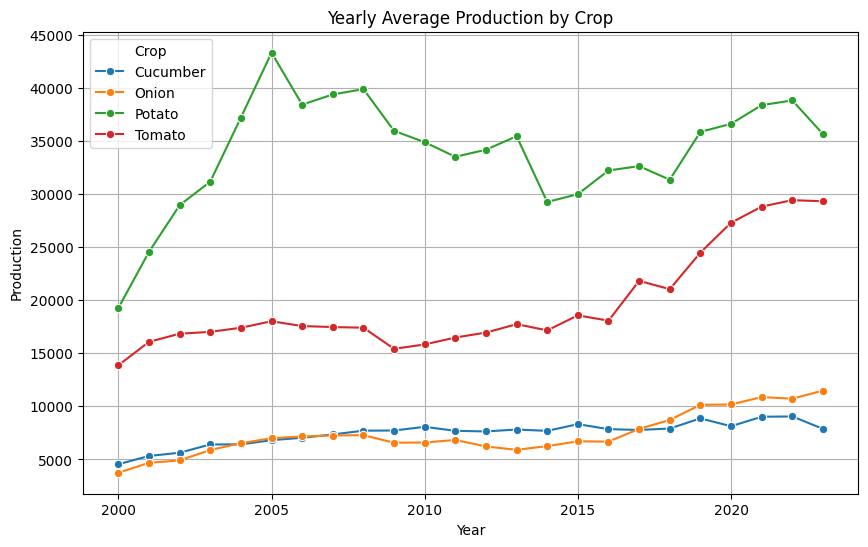

In [5]:
grouped_prod = df_prod.groupby(['Year','Crop'])['Production'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_prod, x='Year', y='Production', hue='Crop', marker='o')
plt.title('Yearly Average Production by Crop')
plt.xlabel('Year')
plt.ylabel('Production')
plt.grid(True)
plt.show()


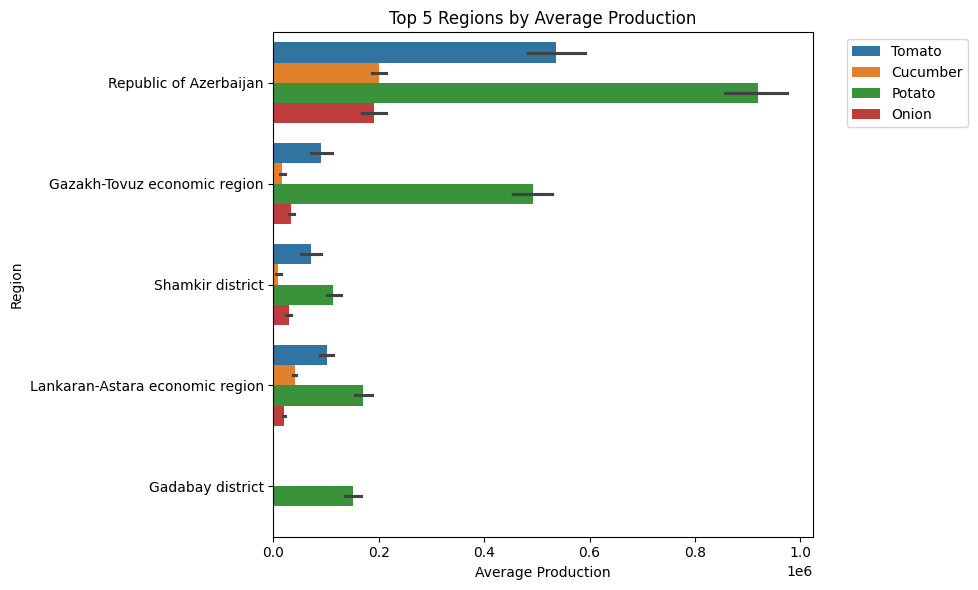

In [6]:
top5_regions_prod = df_prod.groupby('Region')['Production'].mean().nlargest(5).index
df_top5_prod = df_prod[df_prod['Region'].isin(top5_regions_prod)]
plt.figure(figsize=(10,6))
sns.barplot(data=df_top5_prod, x='Production', y='Region', hue='Crop', estimator=np.mean)
plt.title('Top 5 Regions by Average Production')
plt.xlabel('Average Production')
plt.ylabel('Region')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
df_filtered = df_prod[df_prod['Region'] != "Republic of Azerbaijan"]

region_totals = df_filtered.groupby(['Crop', 'Region'])['Production'].sum().reset_index()

highest_regions = region_totals.loc[region_totals.groupby('Crop')['Production'].idxmax()]
print("Regions with highest production for each crop (excluding 'Republic of Azerbaijan'):\n")
print(highest_regions)


Regions with highest production for each crop (excluding 'Republic of Azerbaijan'):

         Crop                           Region  Production
48   Cucumber  Lankaran-Astara economic region    968543.9
124     Onion         Karabakh economic region   1810019.6
193    Potato     Gazakh-Tovuz economic region  11833559.4
303    Tomato  Lankaran-Astara economic region   2437451.3
